# Week 3 Deliverable

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict the house pricing

# Load the data

In [2]:
#input
df = pd.read_csv('../../data/raw/complete.csv')
print(df.columns)
df.head()

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


# Feature Engineering 

In [6]:
# feature engineering
X_columns = ['shot_power', 'heading_accuracy', 'finishing', 'ball_control', 'age', 'penalties', 'positioning', 'potential', 'composure']
y_column = ['eur_value']

# Model Training

In [7]:
# split the data

threshold = 0.8
absolute_threshold = int(len(df)*threshold)

X_train = df.ix[:absolute_threshold, X_columns]
y_train = df.ix[:absolute_threshold, y_column]

X_test = df.ix[absolute_threshold:, X_columns]
y_test = df.ix[absolute_threshold:, y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (14396, 9)
y_train (14396, 1)
X_test (3599, 9)
y_test (3599, 1)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [9]:
# feature importance
importance = []
for i in range(len(X_columns)):
    importance.append([X_columns[i], model.feature_importances_[i]])
pd.DataFrame(importance).sort_values(by=1, ascending=False)

,0,1
7,potential,0.635000
4,age,0.133037
3,ball_control,0.096071
8,composure,0.071214
6,positioning,0.026728
2,finishing,0.013024
0,shot_power,0.009213
5,penalties,0.008435
1,heading_accuracy,0.007277


# Model Evaluation

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 174001.52820227842
RMSE 194355.1532744489


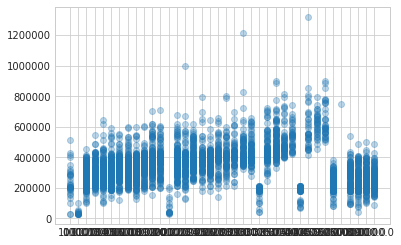

In [11]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()